In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


TOPO="test"
SCHED="ecf-10"
REP=1


In [99]:
downloads = pd.DataFrame()
for i in range(0,REP):
    d = pd.read_csv("./{topo}-{sched}/download-{i}.csv".format(topo=TOPO, sched=SCHED, i=i))
    d["i"] = i
    downloads = pd.concat([downloads, d])

downloads["mbps"] = downloads["recv_bytes"] * 8 / (1024)/ downloads["elapsed"]


<AxesSubplot: xlabel='i'>

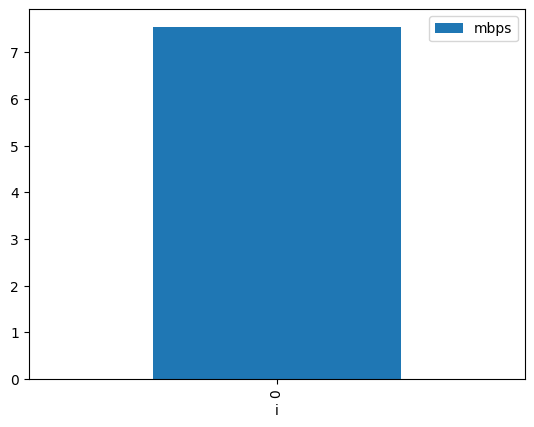

In [100]:
downloads.plot.bar(x="i", y = "mbps")

In [101]:
stats = pd.read_csv("./{}-{}/path-0.csv".format(TOPO, SCHED))

#stats.index = pd.to_timedelta(stats["elapsed"], unit="ms")
stats["sent_bits"] = stats["sent_bytes"] * 8
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits
0,1064,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464
1,1087,10.0.3.10:4433,10.0.1.1:5555,2291,1707,13500,536,22,8,13500,18328
2,1110,10.0.3.10:4433,10.0.1.1:5555,2291,1755,13500,0,22,6,13500,18328
3,1402,10.0.3.10:4433,10.0.1.1:5555,2291,1755,13500,0,22,6,13500,18328
4,1402,10.0.3.10:4433,10.0.2.1:6666,1350,1350,13500,1350,0,0,13500,10800


In [102]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

stats["path"] = "lte"
stats.loc[stats['remote']==remote_addr_wifi, "path"] = "wifi"

In [103]:
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits,path
0,1064,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464,lte
1,1087,10.0.3.10:4433,10.0.1.1:5555,2291,1707,13500,536,22,8,13500,18328,lte
2,1110,10.0.3.10:4433,10.0.1.1:5555,2291,1755,13500,0,22,6,13500,18328,lte
3,1402,10.0.3.10:4433,10.0.1.1:5555,2291,1755,13500,0,22,6,13500,18328,lte
4,1402,10.0.3.10:4433,10.0.2.1:6666,1350,1350,13500,1350,0,0,13500,10800,wifi


## Throughput and RTT

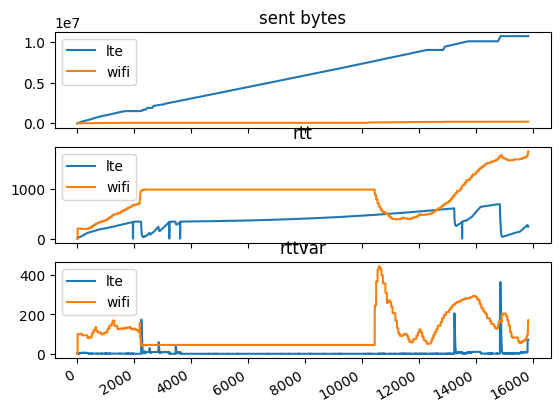

In [104]:
figure,axis =plt.subplots(3,1)


stats[stats["path"] == "lte"]["sent_bytes"].plot(x="elapsed", label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bytes"].plot(x="elapsed", label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("sent bytes")

stats[stats["path"] == "lte"]["rtt"].plot(x="elapsed", label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].plot(x="elapsed", label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()

stats[stats["path"] == "lte"]["rttvar"].plot(x="elapsed", label="lte",ax=axis[2])
stats[stats["path"] == "wifi"]["rttvar"].plot(x="elapsed", label="wifi",ax=axis[2])
axis[2].set_title("rttvar")
axis[2].legend()


plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'RTT VAR')

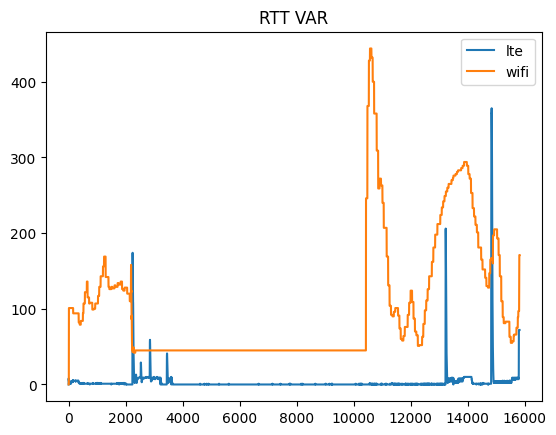

In [105]:
stats[stats["path"] == "lte"]["rttvar"].plot(label="lte")
stats[stats["path"] == "wifi"]["rttvar"].plot(label="wifi")
plt.legend()
plt.title("RTT VAR")


## CWND and BIF

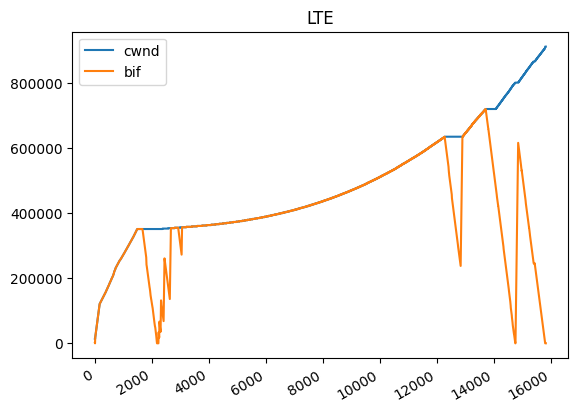

In [106]:
stats[stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

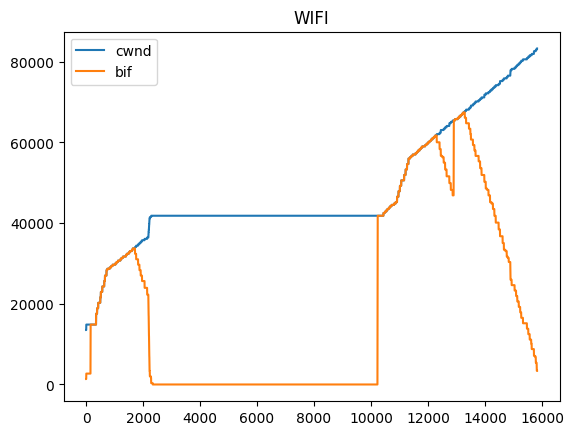

In [107]:
stats[stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## ECF stats

In [108]:
ecf = pd.read_csv("./{}-{}/ecf-0.csv".format(TOPO, SCHED))
ecf["send_on_best_path"] = ~ecf["best_path_blocked"]
ecf["wait"] = ecf["best_path_blocked"] & ~ecf["send_on_second_path"]

ecf.head()

,elapsed,count,waiting,best_path_cwnd,second_path_cwnd,best_path_rtt,second_path_rtt,best_path_blocked,send_on_second_path,term1,term2,term3,term4,best_path_peer_addr,second_path_peer_addr,send_on_best_path,wait
0,1063,1,False,0,0,0,0,False,False,0,0,0,0,0,0,True,False
1,1064,1,False,0,0,0,0,False,False,0,0,0,0,0,0,True,False
2,1064,1,False,13500,13500,333,333,False,False,0,0,0,0,5555,5555,True,False
3,1087,1,False,13500,13500,22,22,False,False,0,0,0,0,5555,5555,True,False
4,1087,1,False,13500,13500,22,22,False,False,0,0,0,0,5555,5555,True,False


<AxesSubplot: xlabel='elapsed'>

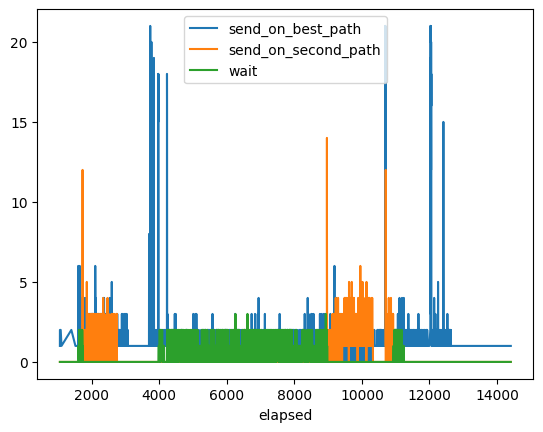

In [109]:
ecf.groupby(["elapsed"])[["send_on_best_path","send_on_second_path", "wait"]].sum().plot()

<AxesSubplot: xlabel='elapsed'>

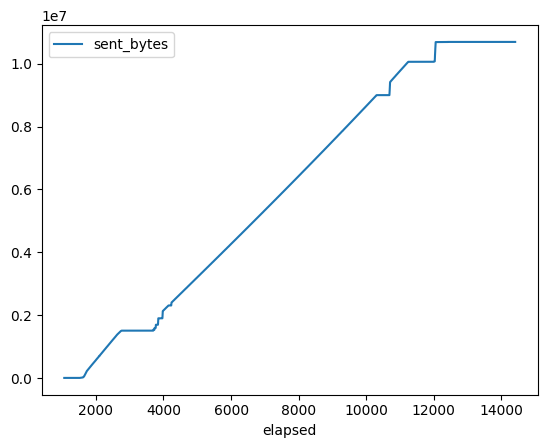

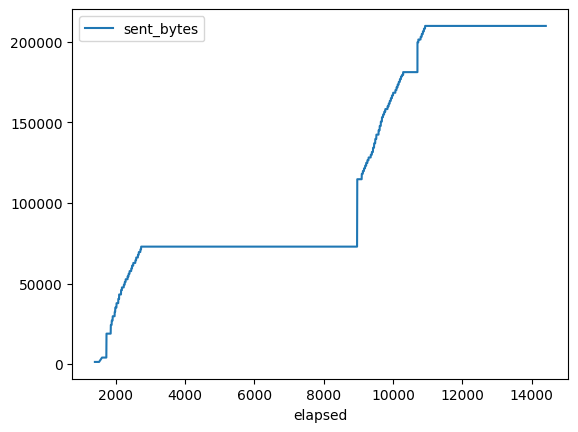

In [110]:
stats[stats["path"] == "lte"][["elapsed","sent_bytes"]].plot(x="elapsed", label="lte")
stats[stats["path"] == "wifi"][["elapsed","sent_bytes"]].plot(x="elapsed", label="wifi")

